In [1]:
import torch
import pandas as pd
import jax.numpy as jnp
from jax import grad, jit, vmap
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Normalizer
from sklearn.metrics import mean_absolute_error,mean_absolute_error
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

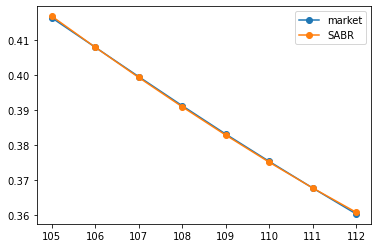

In [4]:
import QuantLib as ql
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

strikes = [105, 106, 107, 108, 109, 110, 111, 112]
fwd = 120.44
expiryTime = 17/365
marketVols = [0.4164, 0.408, 0.3996, 0.3913, 0.3832, 0.3754, 0.3678, 0.3604]

params = [0.1] * 4
def f(params):
    vols = np.array([
        ql.sabrVolatility(strike, fwd, expiryTime, *params)
        for strike in strikes
    ])
    return ((vols - np.array(marketVols))**2 ).mean() **.5

cons=(
    {'type': 'ineq', 'fun': lambda x:  0.99 - x[1]},
    {'type': 'ineq', 'fun': lambda x: x[1]},    
    {'type': 'ineq', 'fun': lambda x: x[3]}
)

result = minimize(f, params, constraints=cons)
new_params = result['x']

newVols = [ql.sabrVolatility(strike, fwd, expiryTime, *new_params) for strike in strikes]
plt.plot(strikes, marketVols, marker='o', label="market")
plt.plot(strikes, newVols, marker='o', label="SABR")
plt.legend();